In [1]:
import numpy as np
from copy import copy
from IPython.display import Audio
from scipy.io import wavfile
from scipy.fftpack import fft, ifft, rfft, irfft
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt

In [2]:
AUDIO_FILE = "hello.wav"

In [3]:
Audio(AUDIO_FILE)

In [4]:
s_rate, wav = wavfile.read(AUDIO_FILE)
N = len(wav)
T = np.linspace(0, N / s_rate, N)

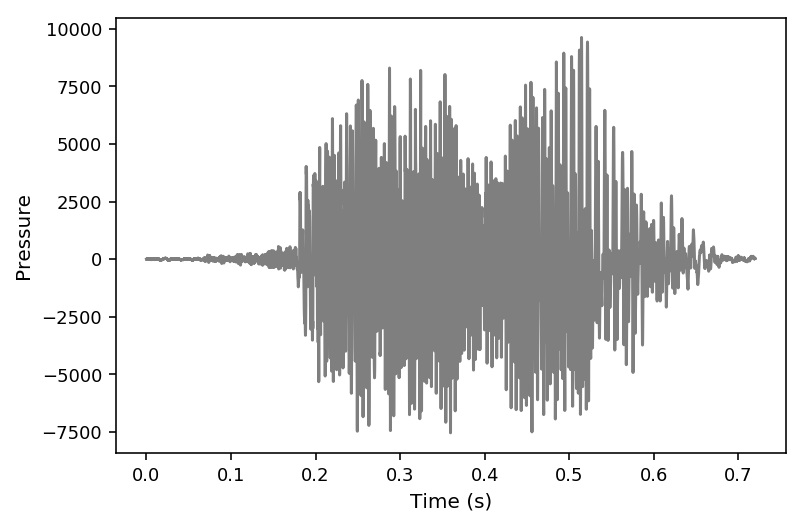

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T, wav, color='k', alpha=.5)

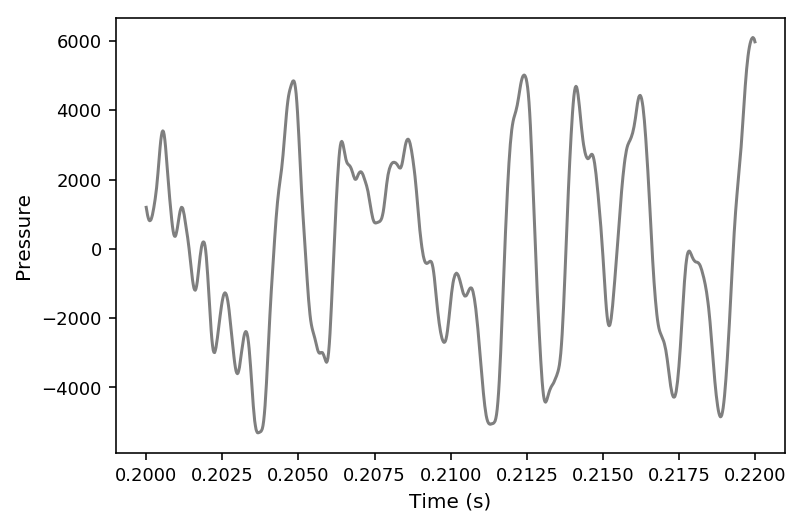

In [6]:
T0 = .2
T1 = .22
T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.5)

In [10]:
wav_ft = fft(wav)

In [11]:
# c
wav_ft.real[0]

11978.0

In [12]:
# The first 20 cos componants
wav_ft.real[1:21]

array([ 8749.3852825 ,  6754.5686172 , 10991.63027488,  9075.96993772,
        7291.54836766, 10956.74751621,  7553.40337305,  8174.3895804 ,
        9925.27965656,  9314.47230338,  6433.53040536, 13845.73077637,
        4887.04322272, 11529.2905777 ,  2554.56029395,  8185.84656726,
       -2292.82875616, 28404.01368758, 22262.90644995, 14986.21183705])

In [13]:
# The first 20 sin componants
wav_ft.imag[1:21]

array([  1587.88547686,   -641.22645383,   1100.35647151,   -166.25166763,
        -1793.01747072,   2505.95528634,   1679.38070803,  -2463.23579186,
         -749.58435702,   -247.57318205,   2975.86137149,   -283.67455141,
        -1451.19613555,   -344.66998385,   4961.98408428,  -1385.38376512,
       -13449.55243083, -13842.82903586,   4355.7722344 ,     88.77961444])

(0, 2000)

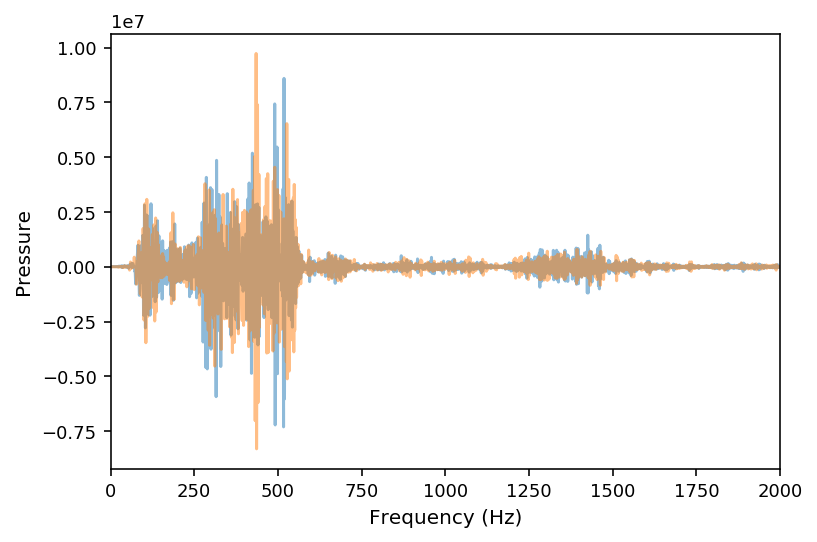

In [15]:
fig, ax = plt.subplots()
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.plot(f, wav_ft[0:N//2].real, alpha=.5)
ax.plot(f, wav_ft[0:N//2].imag, alpha=.5)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Pressure")
ax.set_xlim([0, 2000])

In [16]:
N_app = 400 # 400
wav_ft_approx = copy(wav_ft)
wav_ft_approx[N_app+1:-N_app] = 0
wav_approx = ifft(wav_ft_approx)
wav_approx = wav_approx.real

(0, 2000)

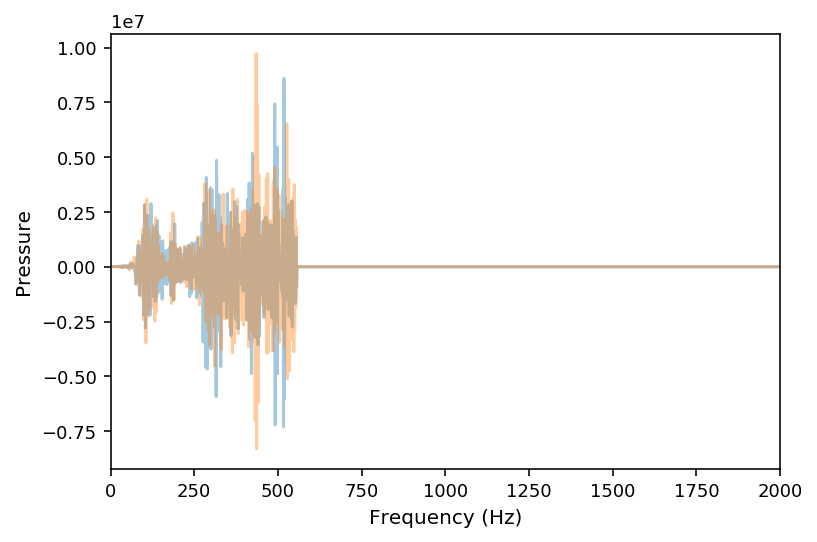

In [17]:
fig, ax = plt.subplots()
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Pressure")
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.plot(f, wav_ft_approx[0:N//2].real, alpha=.4)
ax.plot(f, wav_ft_approx[0:N//2].imag, alpha=.4)
ax.set_xlim([0, 2000])

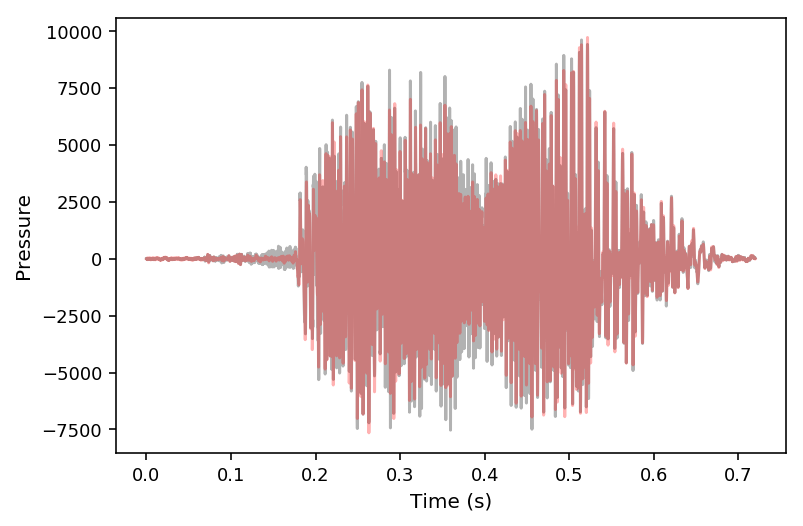

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
plt.plot(T, wav, color='k', alpha=.3)
plt.plot(T, wav_approx, color='r', alpha=.3)

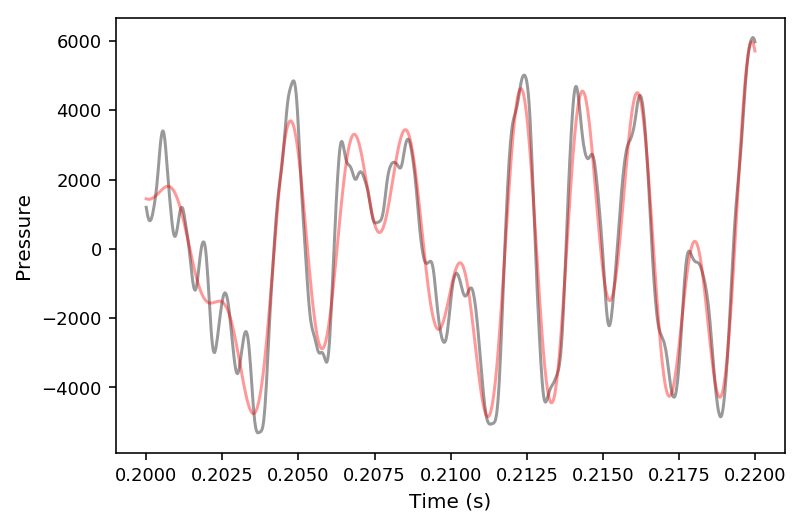

In [19]:
T0 = .2
T1 = .22

T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
wav_approx_snip = wav_approx[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.4)
ax.plot(T_snip, wav_approx_snip, color='r', alpha=.4)

In [20]:
wavfile.write(AUDIO_FILE+"_cut.wav", s_rate, wav_approx*.001)

In [21]:
Audio(AUDIO_FILE+"_cut.wav")

In [22]:
Audio(AUDIO_FILE)

# Compression

In [41]:
x = wav_ft.real
y = wav_ft.imag

In [42]:
print(len(np.nonzero(x)[0]) + len(np.nonzero(y)[0]))

63486


In [44]:
THRESH = float(0.25e7) # 0.1e7

wav_ft_approx = copy(wav_ft)
x = wav_ft_approx.real
y = wav_ft_approx.imag
x[1:][np.abs(x[1:]) < THRESH] = 0
y[1:][np.abs(y[1:]) < THRESH] = 0
wav_ft_approx = x + 1j * y
wav_approx = ifft(wav_ft_approx)
wav_approx = wav_approx.real

In [45]:
print(len(np.nonzero(x)[0]) + len(np.nonzero(y)[0]))

229


(0, 2000)

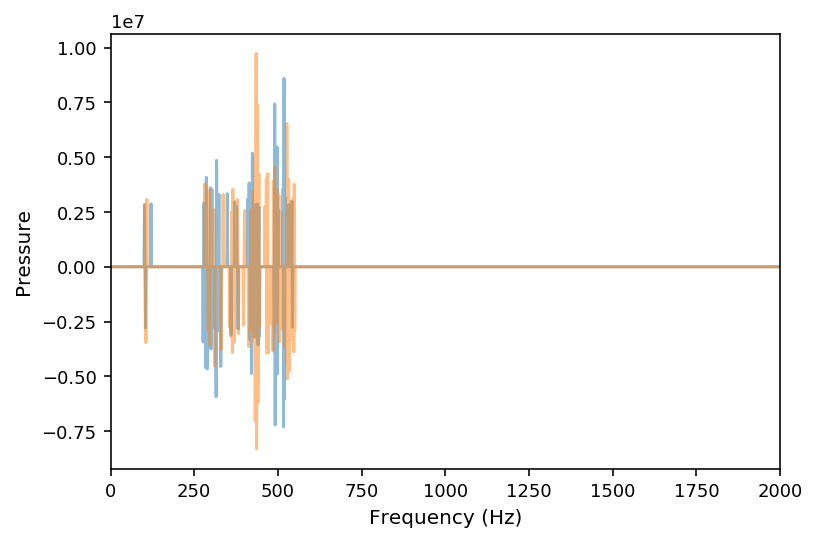

In [46]:
fig, ax = plt.subplots()
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Pressure")
ax.plot(f, wav_ft_approx[0:N//2].real, alpha=.5)
ax.plot(f, wav_ft_approx[0:N//2].imag, alpha=.5)
ax.set_xlim([0, 2000])

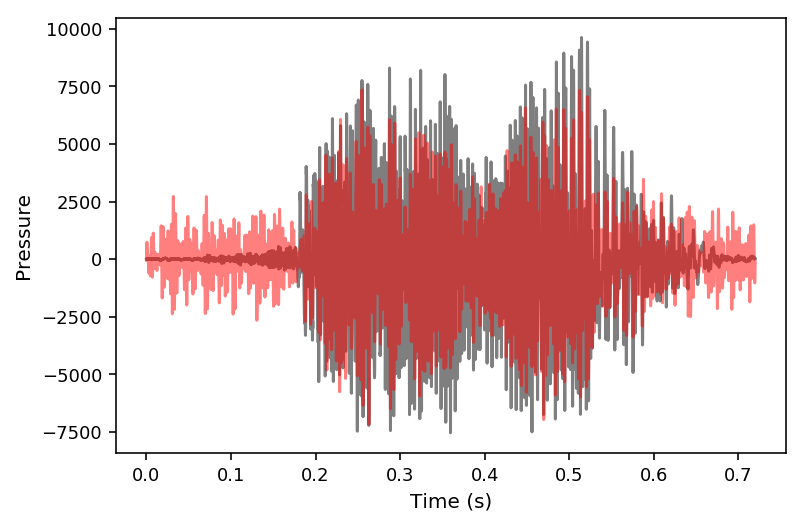

In [47]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T, wav, color='k', alpha=.5)
ax.plot(T, wav_approx, color='r', alpha=.5)

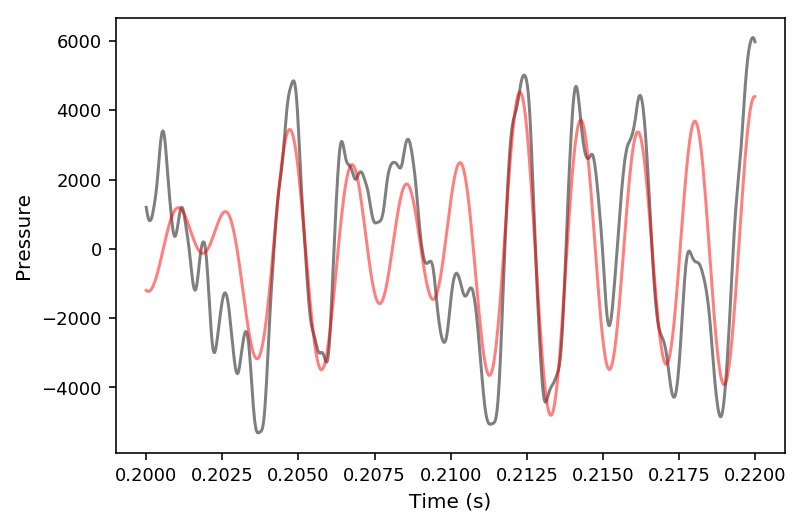

In [48]:
T0 = .2
T1 = .22

T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
wav_approx_snip = wav_approx[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.5)
ax.plot(T_snip, wav_approx_snip, color='r', alpha=.5)

In [49]:
wavfile.write(AUDIO_FILE + "_comp.wav", s_rate, wav_approx*.001)

In [50]:
Audio(AUDIO_FILE + "_comp.wav")

In [51]:
Audio(AUDIO_FILE)

# A low pass filter

In [35]:
# Cutoff frequency
F = 400

b, a = butter(4, 2.0*F/s_rate, btype='low')
wav_lp = filtfilt(b, a, wav, padlen=150)
wav_lp_ft = fft(wav_fil_lp)

NameError: name 'wav_fil_lp' is not defined

NameError: name 'xf' is not defined

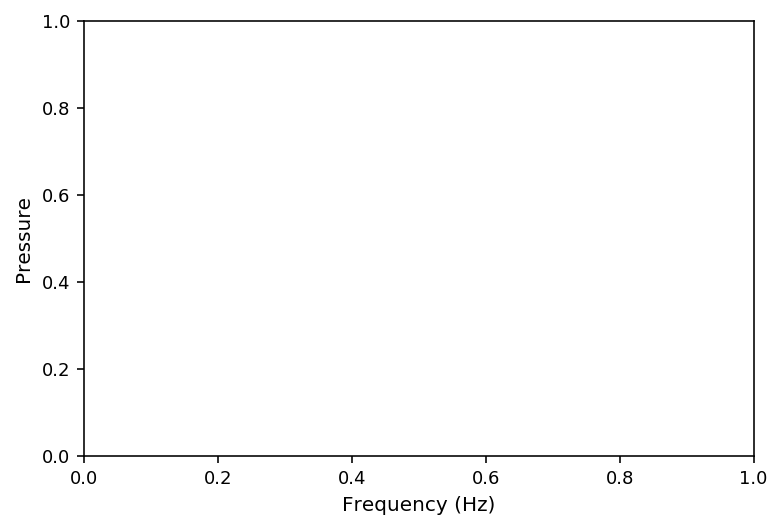

In [36]:
fig, ax = plt.subplots()
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Pressure")
ax.plot(xf, wav_lp_ft[0:N//2].real, alpha=.5)
ax.plot(xf, wav_lp_ft[0:N//2].imag, alpha=.5)
ax.set_xlim([0, 2000])

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
plt.plot(T, wav, color='k', alpha=.5)
plt.plot(T, wav_lp, color='r', alpha=.5)

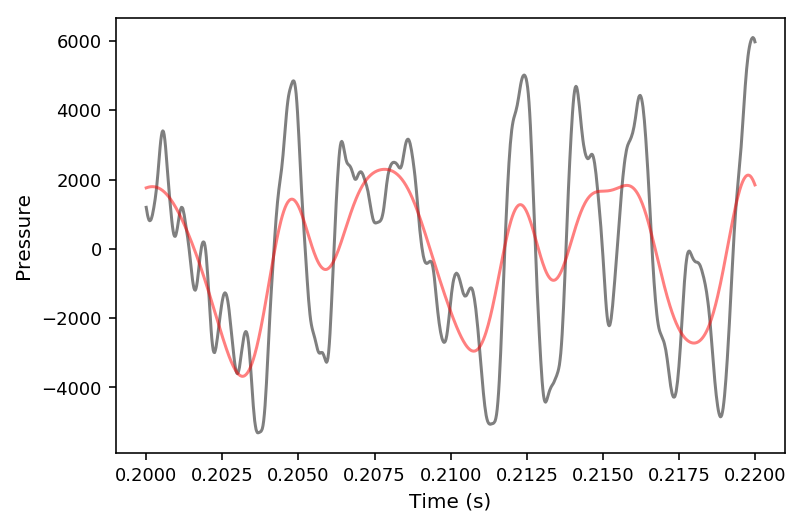

In [37]:
T0 = .2
T1 = .22
T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
wav_approx_snip = wav_lp[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.5)
ax.plot(T_snip, wav_approx_snip, color='r', alpha=.5)

In [38]:
wavfile.write(AUDIO_FILE + "_lp.wav", s_rate, wav_lp*.001)

In [40]:
Audio(AUDIO_FILE+ "_lp.wav")

# A high pass filter

In [ ]:
# Cutoff frequency
F = 400

b, a = butter(4, 2.0*F/s_rate, btype='high')
wav_hp = filtfilt(b, a, wav)
wav_hp_ft = fft(wav_hp)

In [ ]:
fig, ax = plt.subplots()
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.set_xlabel("Frequncy (Hz)")
ax.set_ylabel("Pressure")
ax.plot(xf, wav_hp_ft[0:N//2].real, alpha=.5)
ax.plot(xf, wav_hp_ft[0:N//2].imag, alpha=.5)
ax.set_xlim([0, 2000])

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
plt.plot(T, wav, color='k', alpha=.5)
plt.plot(T, wav_hp, color='r', alpha=.5)

In [ ]:
T0 = .2
T1 = .22
T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
wav_approx_snip = wav_hp[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.5)
ax.plot(T_snip, wav_approx_snip, color='r', alpha=.5)

In [ ]:
wavfile.write(AUDIO_FILE + "_hp.wav", s_rate, wav_hp*.001)

In [ ]:
Audio(AUDIO_FILE + "_hp.wav")

In [ ]:
Audio(AUDIO_FILE)

# A high pass + compression

In [ ]:
F = 400
b, a = butter(4, 2.0*F/s_rate, btype='high')
wav_hp = filtfilt(b, a, wav)
wav_hp_ft = fft(wav_hp)

In [ ]:
THRESH = float(0.05e7) # .01

wav_ft_approx = copy(wav_hp_ft)
x = wav_ft_approx.real
y = wav_ft_approx.imag
x[1:][np.abs(x[1:]) < THRESH] = 0
y[1:][np.abs(y[1:]) < THRESH] = 0
wav_ft_approx = x + 1j * y
wav_approx = ifft(wav_ft_approx)
wav_approx = wav_approx.real

In [ ]:
print(len(np.nonzero(x)[0]) + len(np.nonzero(y)[0]))

In [ ]:
fig, ax = plt.subplots()
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Pressure")
ax.plot(xf, wav_ft_approx[0:N//2].real, alpha=.5)
ax.plot(xf, wav_ft_approx[0:N//2].imag, alpha=.5)
ax.set_xlim([0, 2000])

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
plt.plot(T, wav, color='k', alpha=.5)
plt.plot(T, wav_approx, color='r', alpha=.5)

In [ ]:
T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
wav_approx_snip = wav_approx[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.5)
ax.plot(T_snip, wav_approx_snip, color='r', alpha=.5)

In [ ]:
wavfile.write(AUDIO_FILE + "_hp_comp.wav", s_rate, wav_approx*.001)

In [ ]:
Audio(AUDIO_FILE + "_hp_comp.wav")

In [ ]:
Audio(AUDIO_FILE)

# A low pass + compression

In [ ]:
# Frequncy cutoff
F = 1000

b, a = butter(4, 2.0*F/s_rate, btype='low')
wav_hp = filtfilt(b, a, wav)
wav_hp_ft = fft(wav_hp)

In [ ]:
THRESH = float(0.3e7) # .01

wav_ft_approx = copy(wav_hp_ft)
x = wav_ft_approx.real
y = wav_ft_approx.imag
x[1:][np.abs(x[1:]) < THRESH] = 0
y[1:][np.abs(y[1:]) < THRESH] = 0
wav_ft_approx = x + 1j * y
wav_approx = ifft(wav_ft_approx)
wav_approx = wav_approx.real

In [ ]:
print(len(np.nonzero(x)[0]) + len(np.nonzero(y)[0]))

In [ ]:
fig, ax = plt.subplots()
f = np.linspace(0.0, s_rate/2.0, N//2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Pressure")
ax.plot(xf, wav_ft_approx[0:N//2].real, alpha=.5)
ax.plot(xf, wav_ft_approx[0:N//2].imag, alpha=.5)
ax.set_xlim([0, 2000])

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
plt.plot(T, wav, color='k', alpha=.5)
plt.plot(T, wav_approx, color='r', alpha=.5)

In [ ]:
T_snip = T[int(T0*s_rate):int(T1*s_rate)]
wav_snip = wav[int(T0*s_rate):int(T1*s_rate)]
wav_approx_snip = wav_approx[int(T0*s_rate):int(T1*s_rate)]
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure")
ax.plot(T_snip, wav_snip, color='k', alpha=.5)
ax.plot(T_snip, wav_approx_snip, color='r', alpha=.5)

In [ ]:
wavfile.write(AUDIO_FILE + "_lp_comp.wav", s_rate, wav_approx*.001)

In [ ]:
Audio(AUDIO_FILE + "_lp_comp.wav")

In [ ]:
Audio(AUDIO_FILE)